<a href="https://colab.research.google.com/github/pankaj90382/TSAI/blob/master/S7/S7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import sys
S7_PROJECT_PATH = '/content/drive/My Drive/Colab Notebooks/Github_Repo/The_School_of_AI/TSAI/S7'
sys.path.append(S7_PROJECT_PATH+'/S7_Modular_Code/')
import os
os.chdir(S7_PROJECT_PATH+'/S7_Modular_Code/')

In [0]:
from __future__ import print_function
import torch
import torchvision
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
#!pip install torchsummary
from torchsummary import summary
import pandas as pd
import numpy as np

# Dataloader Arguments & Test/Train Dataloaders


In [5]:
from DataTransform import Transforms
from DataLoader import DataLoader
common_transforms = Transforms(normalize=False, mean=None, stdev=None)

# Downloading TrainSet
trainset = datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=common_transforms.train_transforms())
# Downloading Testset
testset = datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=common_transforms.test_transforms())

# Calculating Mean and Std dev
# We'd need to convert it into Numpy! Remember above we have converted it into tensors already
train_data = trainset.data
#train_data = trainset.transform(train_data.numpy())

test_data = testset.data
#test_data = testset.transform(test_data.numpy())

full_data = np.concatenate((train_data, test_data),axis=0)

full_data.reshape(-1,full_data.shape[-1])

std=full_data.reshape(-1,full_data.shape[-1]).mean(0)/255

mean=full_data.reshape(-1,full_data.shape[-1]).std(0)/255

Files already downloaded and verified
Files already downloaded and verified


In [6]:
SEED = 1

updated_transforms= Transforms(normalize=True, mean=(0.49186878, 0.48265391, 0.44717728), stdev=(0.24697121, 0.24338894, 0.26159259))

# Downloading TrainSet
trainset = datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=updated_transforms.train_transforms())

# Downloading Testset
testset = datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=updated_transforms.test_transforms())

# Creating object of a class
dataloader= DataLoader(shuffle=True, batch_size=64, seed=SEED, num_workers=2, pin_memory=True)


# train data loader
trainloader = dataloader.load(trainset)

# test data loader
testloader = dataloader.load(testset)

Files already downloaded and verified
Files already downloaded and verified
CUDA Available? True


The output of torchvision datasets are PILImage images of range [0, 1].
We transform them to Tensors of normalized range [-1, 1].



In [0]:
# classes in cifar 10
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Let us show some of the training images, for fun.



Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


 ship  deer  bird   car


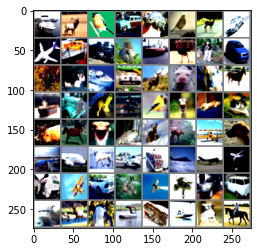

In [8]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image

def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))


# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

2. Define a Convolution Neural Network
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
Copy the neural network from the Neural Networks section before and modify it to
take 3-channel images (instead of 1-channel images as it was defined).



In [9]:
import torch.nn as nn
import torch.nn.functional as F
from Model import Cfar10Net
model = Cfar10Net(dropout_value=0.1).to(dataloader.device)
model.summary(input_size=(3, 32, 32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 32, 32]             864
              ReLU-2           [-1, 32, 32, 32]               0
       BatchNorm2d-3           [-1, 32, 32, 32]              64
           Dropout-4           [-1, 32, 32, 32]               0
            Conv2d-5           [-1, 32, 32, 32]           9,216
              ReLU-6           [-1, 32, 32, 32]               0
       BatchNorm2d-7           [-1, 32, 32, 32]              64
           Dropout-8           [-1, 32, 32, 32]               0
         MaxPool2d-9           [-1, 32, 16, 16]               0
           Conv2d-10           [-1, 64, 16, 16]          18,432
             ReLU-11           [-1, 64, 16, 16]               0
      BatchNorm2d-12           [-1, 64, 16, 16]             128
          Dropout-13           [-1, 64, 16, 16]               0
           Conv2d-14           [-1, 64,

3. Define a Loss function and optimizer
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
Let's use a Classification Cross-Entropy loss and SGD with momentum.



In [10]:
import torch.optim as optim
from torch.optim.lr_scheduler import OneCycleLR
Loss="CrossEntropyLoss"
EPOCHS = 20
model.device=dataloader.device
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)
model.gotrain(optimizer=optimizer, train_loader=trainloader, test_loader=testloader, epochs=EPOCHS, statspath=S7_PROJECT_PATH+"/Save_Model/", scheduler=None, batch_scheduler=False, L1lambda=0, LossType=Loss)


Validation loss decreased (100000.000000 --> 1.558001).  Saving model ...
Epoch: 1, Train set: Average loss: 0.0223, Accuracy: 48.49%; Test set: Average loss: 1.5580, Accuracy: 54.69%



Validation loss decreased (1.558001 --> 1.272919).  Saving model ...
Epoch: 2, Train set: Average loss: 0.0162, Accuracy: 63.19%; Test set: Average loss: 1.2729, Accuracy: 63.16%



Validation loss decreased (1.272919 --> 1.130471).  Saving model ...
Epoch: 3, Train set: Average loss: 0.0135, Accuracy: 69.19%; Test set: Average loss: 1.1305, Accuracy: 68.25%



Validation loss decreased (1.130471 --> 1.046145).  Saving model ...
Epoch: 4, Train set: Average loss: 0.0120, Accuracy: 73.14%; Test set: Average loss: 1.0461, Accuracy: 71.35%



Validation loss decreased (1.046145 --> 0.934866).  Saving model ...
Epoch: 5, Train set: Average loss: 0.0108, Accuracy: 76.09%; Test set: Average loss: 0.9349, Accuracy: 73.76%



Validation loss decreased (0.934866 --> 0.918350).  Saving model ...
Epoch: 6, Train set: Average loss: 0.0099, Accuracy: 77.82%; Test set: Average loss: 0.9183, Accuracy: 75.04%



Validation loss decreased (0.918350 --> 0.816676).  Saving model ...
Epoch: 7, Train set: Average loss: 0.0091, Accuracy: 79.50%; Test set: Average loss: 0.8167, Accuracy: 77.46%



Validation loss decreased (0.816676 --> 0.783907).  Saving model ...
Epoch: 8, Train set: Average loss: 0.0085, Accuracy: 81.03%; Test set: Average loss: 0.7839, Accuracy: 78.41%



Epoch: 9, Train set: Average loss: 0.0080, Accuracy: 82.20%; Test set: Average loss: 0.8518, Accuracy: 76.72%



Validation loss decreased (0.783907 --> 0.781099).  Saving model ...
Epoch: 10, Train set: Average loss: 0.0075, Accuracy: 83.54%; Test set: Average loss: 0.7811, Accuracy: 79.50%



Validation loss decreased (0.781099 --> 0.737933).  Saving model ...
Epoch: 11, Train set: Average loss: 0.0070, Accuracy: 84.53%; Test set: Average loss: 0.7379, Accuracy: 80.04%



Epoch: 12, Train set: Average loss: 0.0066, Accuracy: 85.25%; Test set: Average loss: 0.7520, Accuracy: 79.61%



Validation loss decreased (0.737933 --> 0.737193).  Saving model ...
Epoch: 13, Train set: Average loss: 0.0062, Accuracy: 86.13%; Test set: Average loss: 0.7372, Accuracy: 80.64%



Epoch: 14, Train set: Average loss: 0.0059, Accuracy: 86.92%; Test set: Average loss: 0.7458, Accuracy: 80.64%



Epoch: 15, Train set: Average loss: 0.0055, Accuracy: 88.07%; Test set: Average loss: 0.7544, Accuracy: 79.81%



Validation loss decreased (0.737193 --> 0.736807).  Saving model ...
Epoch: 16, Train set: Average loss: 0.0051, Accuracy: 88.57%; Test set: Average loss: 0.7368, Accuracy: 81.05%



Epoch: 17, Train set: Average loss: 0.0049, Accuracy: 89.18%; Test set: Average loss: 0.7586, Accuracy: 81.11%



Validation loss decreased (0.736807 --> 0.727540).  Saving model ...
Epoch: 18, Train set: Average loss: 0.0046, Accuracy: 89.72%; Test set: Average loss: 0.7275, Accuracy: 81.50%



Epoch: 19, Train set: Average loss: 0.0044, Accuracy: 90.31%; Test set: Average loss: 0.7409, Accuracy: 81.34%



Epoch: 20, Train set: Average loss: 0.0042, Accuracy: 90.77%; Test set: Average loss: 0.7437, Accuracy: 81.37%



Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


GroundTruth:   frog   cat  frog  ship


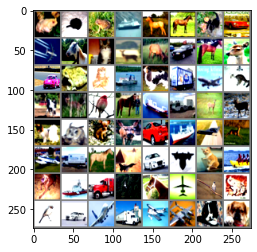

In [11]:
dataiter = iter(testloader)
images, labels = dataiter.next()

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

Okay, now let us see what the neural network thinks these examples above are:



In [0]:
outputs = model(images.to(model.device))

The outputs are energies for the 10 classes.
Higher the energy for a class, the more the network
thinks that the image is of the particular class.
So, let's get the index of the highest energy:



In [13]:
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(4)))

Predicted:    dog   dog  frog  ship


The results seem pretty good.

Let us look at how the network performs on the whole dataset.



In [14]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = model(images.to(model.device)).to("cpu")
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 81 %


That looks waaay better than chance, which is 10% accuracy (randomly picking
a class out of 10 classes).
Seems like the network learnt something.

Hmmm, what are the classes that performed well, and the classes that did
not perform well:



In [15]:
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = model(images.to(model.device)).to('cpu')
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1


for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of plane : 90 %
Accuracy of   car : 83 %
Accuracy of  bird : 69 %
Accuracy of   cat : 57 %
Accuracy of  deer : 72 %
Accuracy of   dog : 79 %
Accuracy of  frog : 80 %
Accuracy of horse : 81 %
Accuracy of  ship : 96 %
Accuracy of truck : 85 %
